<a href="https://colab.research.google.com/github/manoelargc/IA/blob/main/AV1_areaAlagada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação 1 - Inteligência Artificial | 24.1
- **Nome:** Manoela Resende
- **Matrícula:** 2210100235


------------

## Análise de uma Região Alagada feita com Classificação Bayesiana

Foi desenvolvido como parte da Avaliação 1 da disciplina de Inteligência Artificial do 5º semestre de Ciência da Computação - 24.1. O autor deste trabalho é Manoela Resende, com o perfil [manoelargc](https://github.com/manoelargc). Este código implementa um classificador Bayesiano para identificar regiões alagadas do Rio Grande do Sul em uma imagem de satélite, baseado em informações de Regiões de Interesse (ROIs). O classificador é treinado com ROIs de áreas alagadas e de controle, e classifica a imagem com base nas distribuições de probabilidade dos valores de pixel no canal vermelho.



- ## Compilação no Jupyter Notebook

Para compilar o código no Jupyter Notebook, é necessário inserir a imagem [`alagada.jpg`](https://drive.google.com/file/d/12_zqduPwMRYjoO6QMRDQpWhgQhPoI3kF/view?usp=sharing) seguindo o fluxo:

1. No menu lateral, Clique em "Arquivos".
2. Faça upload da imagem `alagada.jpg` para o armazenamento da sessão.
3. Execute as células do notebook na ordem correta.

-------

## Importação de Bibliotecas e Definição das Classes

In [ ]:
# Importação das bibliotecas necessárias
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import scipy.stats as st
from numba import jit

# Classe para representar uma região (ROI) com cálculo de média e desvio padrão
class Region:
    def __init__(self, roi):
        self.mean = np.mean(roi, axis=(0, 1))
        self.std = np.std(roi, axis=(0, 1))

    def posteriori(self, x, channel=0):
        return st.norm.pdf(x, loc=self.mean[channel], scale=self.std[channel])

# Classe para o classificador Bayesiano
class BayesianClassifier:
    def __init__(self, flooded_rois, control_rois):
        self.flooded_regions = [Region(roi) for roi in flooded_rois]
        self.control_regions = [Region(roi) for roi in control_rois]

    def classify(self, image):
        red_channel = image[:, :, 0]
        p_flooded = np.max([region.posteriori(red_channel) for region in self.flooded_regions], axis=0)
        p_control = np.max([region.posteriori(red_channel) for region in self.control_regions], axis=0)
        classification = p_flooded > p_control
        return classification

    def set_weights(self, flooded_weight, control_weight):
        self.flooded_weight = flooded_weight
        self.control_weight = control_weight

# Função para plotar distribuições de probabilidade
def plot_distributions(region1, region2):
    x = np.linspace(0, 255, 100)
    plt.plot(x, region1.posteriori(x), label='Alagada')
    plt.plot(x, region2.posteriori(x), label='Controle')
    plt.legend()
    plt.title("Distribuições de Probabilidade a Posteriori")
    plt.xlabel("Valor de Pixel")
    plt.ylabel("Densidade de Probabilidade")
    plt.show()


## Carregar e Exibir a Imagem

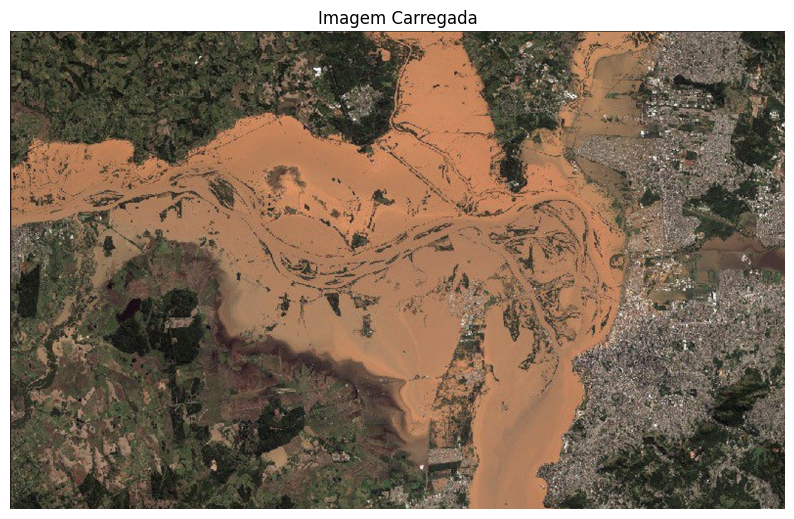

In [ ]:
# Carregar a imagem
image_path = "alagada.png"
image = io.imread(image_path)

# Exibir a imagem
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title("Imagem Carregada")
plt.axis('off')
plt.show()

## Definir e Exibir as ROIs

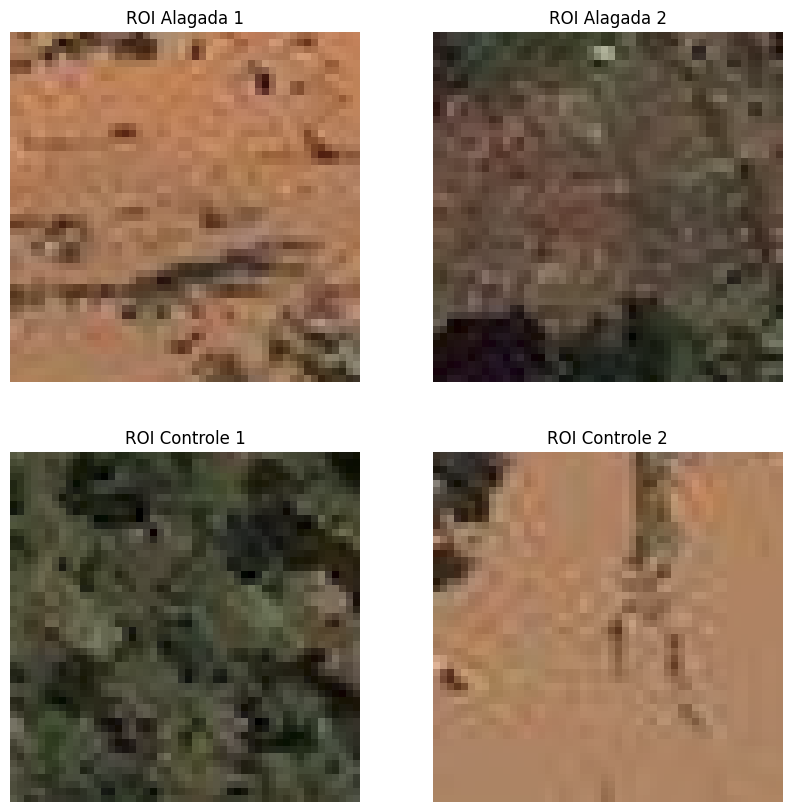

In [ ]:
# Definir ROIs para as áreas alagadas e de controle
roi_flooded_1 = image[200:250, 300:350, :]
roi_flooded_2 = image[400:450, 200:250, :]

roi_control_1 = image[50:100, 50:100, :]
roi_control_2 = image[450:500, 450:500, :]

# Exibir ROIs
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(roi_flooded_1)
axes[0, 0].set_title("ROI Alagada 1")
axes[0, 1].imshow(roi_flooded_2)
axes[0, 1].set_title("ROI Alagada 2")
axes[1, 0].imshow(roi_control_1)
axes[1, 0].set_title("ROI Controle 1")
axes[1, 1].imshow(roi_control_2)
axes[1, 1].set_title("ROI Controle 2")
for ax in axes.flatten():
    ax.axis('off')
plt.show()

## Criar o Classificador Bayesiano e Classificar a Imagem

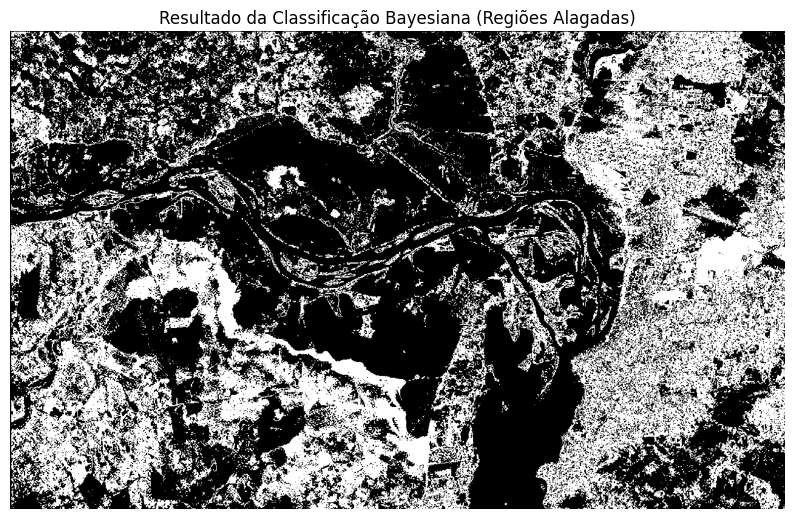

In [ ]:
# Criar instância do classificador Bayesiano
classifier = BayesianClassifier(
    flooded_rois=[roi_flooded_1, roi_flooded_2],
    control_rois=[roi_control_1, roi_control_2]
)

# Ajustar os pesos para melhorar a classificação
classifier.set_weights(flooded_weight=1.0, control_weight=0.8)  # Ajuste os pesos conforme necessário

# Classificar a imagem
classification = classifier.classify(image)

# Exibir o resultado da classificação
plt.figure(figsize=(10, 10))
plt.imshow(classification, cmap='gray')
plt.title("Resultado da Classificação Bayesiana (Regiões Alagadas)")
plt.axis('off')
plt.show()

# Salvar a imagem vetorizada em preto e branco
io.imsave('classification_result.png', (classification * 255).astype(np.uint8), check_contrast=False)



## Plotar as Distribuições de Probabilidade a Posteriori

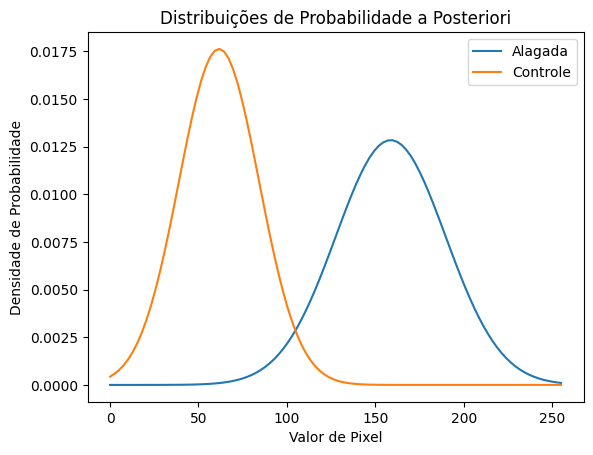

In [ ]:
# Plotar as distribuições de probabilidade a posteriori
plot_distributions(classifier.flooded_regions[0], classifier.control_regions[0])


## Calcular e Exibir Estatísticas das ROIs

In [ ]:
# Calcular e exibir médias e desvios padrões das ROIs
region_flooded_1 = Region(roi_flooded_1)
region_flooded_2 = Region(roi_flooded_2)
region_control_1 = Region(roi_control_1)
region_control_2 = Region(roi_control_2)

print(f"ROI Alagada 1 - Média: {region_flooded_1.mean[0]}, Desvio Padrão: {region_flooded_1.std[0]}")
print(f"ROI Alagada 2 - Média: {region_flooded_2.mean[0]}, Desvio Padrão: {region_flooded_2.std[0]}")
print(f"ROI Controle 1 - Média: {region_control_1.mean[0]}, Desvio Padrão: {region_control_1.std[0]}")
print(f"ROI Controle 2 - Média: {region_control_2.mean[0]}, Desvio Padrão: {region_control_2.std[0]}")

ROI Alagada 1 - Média: 158.6984, Desvio Padrão: 31.066641875812707
ROI Alagada 2 - Média: 80.912, Desvio Padrão: 25.866601168301937
ROI Controle 1 - Média: 61.6024, Desvio Padrão: 22.63244384152979
ROI Controle 2 - Média: 164.1608, Desvio Padrão: 27.368356606855205
